<a href="https://colab.research.google.com/github/wa-le/Zomato-dataset-EDA/blob/master/Zomato_dset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sweetviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/Zomatodataset/zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.info

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.shape

(9551, 21)

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

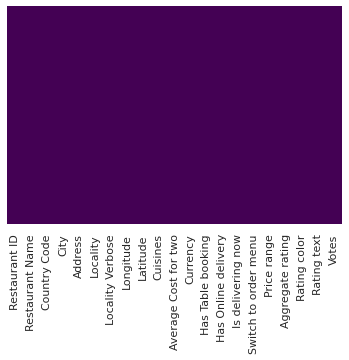

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df_country = pd.read_excel('/content/drive/MyDrive/Data/Zomatodataset/Country-Code.xlsx')
df_country

In [ ]:
# we have country code on both dataframes so we can merge

df_merged = pd.merge(df, df_country, on='Country Code', how='left')
df_merged

In [ ]:
df_merged.head(3)

In [ ]:
# see all datatypes
df_merged.dtypes

In [20]:
df_merged.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [22]:
df_merged['Country'].value_counts()
# We observed that Zomato is mostly available in India so max no of transactions occur in india 

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [27]:
#save the list of countries according to value_counts *highest to lowest
country_names = df_merged['Country'].value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [38]:
country_values = df_merged['Country'].value_counts().values
country_values

array([8652,  434,   80])

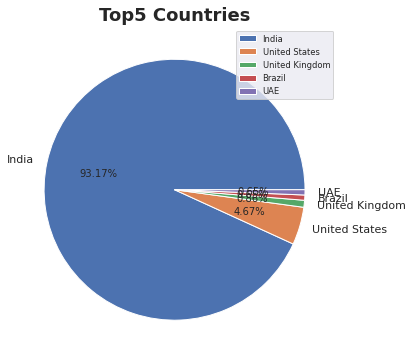

In [58]:
# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(country_values[:5], labels=country_names[:5], autopct= '%1.2f%%')

plt.legend(fontsize = "small")
plt.title("Top5 Countries", fontsize = 18, fontweight = 'bold')
plt.show()

Observation: India has the most transactions/records with 93.17% followed by United States with 4.7%

In [ ]:
import sweetviz as sv
report = sv.analyze(df_merged)
report.show_html()

In [ ]:
# dive into rating
ratings = df_merged.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [100]:
ratings


,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


From the dataset above:
1.   4.5 - 4.9 rating is Excellent
2.   4.0 - 4.4 rating is Very Good
3.   3.5 - 3.9 rating is Good
4.   2.5 - 3.4 rating is Average
5.   1.8 - 2.4 rating is Poor
6.   less than 1.8 rating is Unrated

We also observe that a lot of people did not drop a rating





In [95]:
ratings.head(5)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


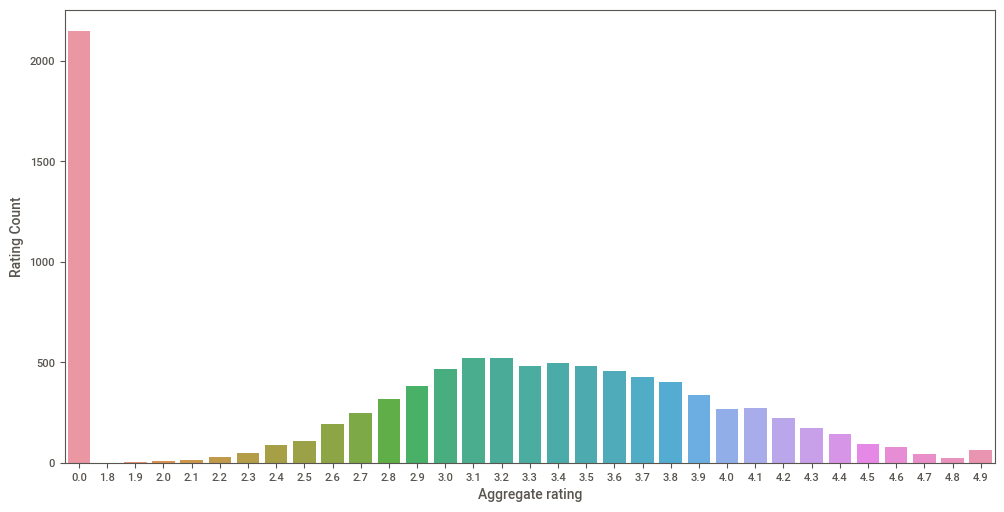

In [97]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings)

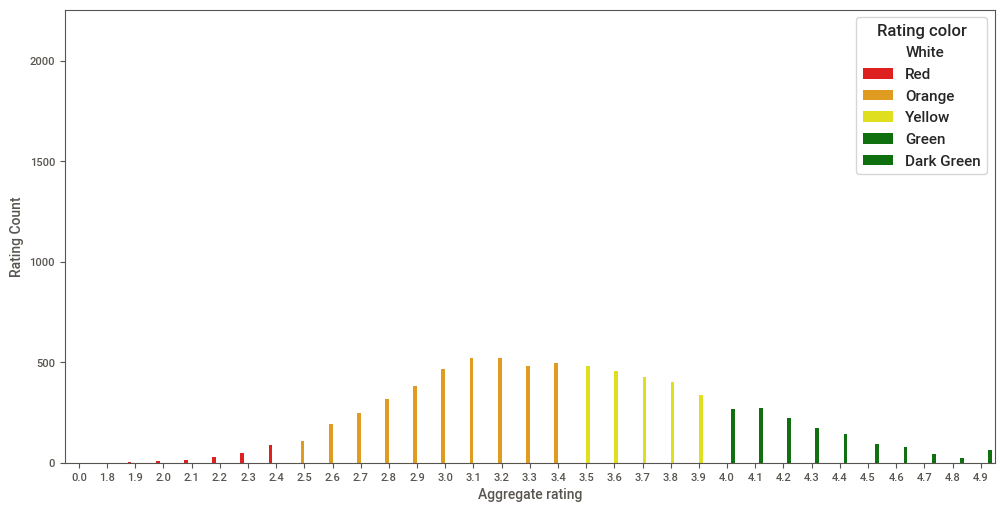

In [99]:
palette=['white', 'red', 'orange', 'yellow', 'green', 'green']
sns.barplot(x='Aggregate rating', y='Rating Count', hue='Rating color', data=ratings, palette=palette)

OBSERVATION

1.   Not Rated is very high
2.   Max number of ratings are beteen 2.5 and 3.4




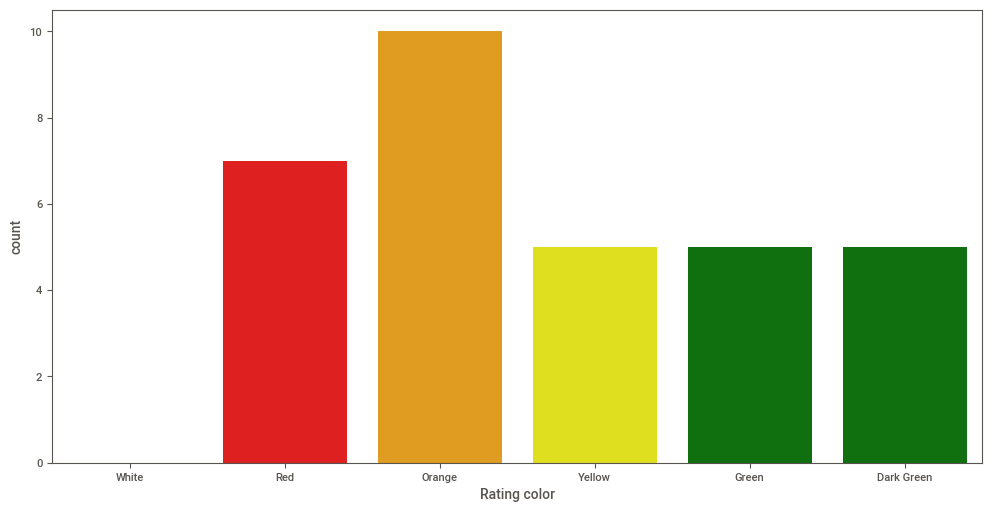

In [101]:
# count plot
sns.countplot(x='Rating color', data=ratings, palette = palette)

In [126]:
df_use = df_merged.copy()

In [131]:
# Find the coutries that has given 0 rating
agg_rate_0 = df_use[df_use['Aggregate rating'] == 0.0]
agg_rate_0['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [139]:
# OR
df_use[df_use['Aggregate rating'] == 0.0].groupby('Country').size().reset_index().rename(columns={0:'Count'})

,Country,Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


OBSERVATION:
Maximum number of 0 ratings are from Indian customers

In [148]:
# Find out which currency is used by which country
df_merged[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [158]:
# has online delivery
df_use[df_use['Has Online delivery'] == 'Yes'].groupby('Country').size().reset_index().rename(columns={0:'Count'})

,Country,Count
0,India,2423
1,UAE,28


In [163]:
# has and does not have online delivery
df_use[['Has Online delivery', 'Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60
